# Assignment 03

You can choose between the text processing and the audio processing.

You should work on both. 
Then choose one of them and submit it by the deadline (check Canvas).

In [1]:
# import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mpl
from scipy.io.wavfile import write
from scipy.io.wavfile import read


# The 'raw' sound wave -- let's print it
def print_wave(signal,n_samples):
    fontsizeV = 12
    mpl.plot(signal[:n_samples])
    mpl.xlabel('Time',fontsize=fontsizeV)
    mpl.ylabel('Amplitude',fontsize=fontsizeV)
    #mpl.title('Title')
    mpl.grid(True)
    mpl.tight_layout()

## Assignment 02: more examples

#### Example 1 of project for assignment 03: Audio processing

1) select a brief jingle (few notes)

2) create the jingle

3) make it sounds pleasent (decay the end of each note, short separation between notes)

4) add small noice in the background (white noise, or some noise you have in data/ folder), still making the sounds recognizable

5) if you want, you can create a small echo, to make the jingle more interesting :)

************
#### Example 2 of project for assignment 03: Audio processing

1) select one audio recording with a short speech (e.g., data/first_sound.wav or data/my_second_example.wav)

2) make the pauses between words shorter (to 0? or to 0.5 seconds?)

3) use the library as in udio_modification to recognize words

4) modify the audio file, add noise (start with small noise and then increase it): are the words still recognizable by the automatic recognition ? what if you increase it substantially? check data/ folder for noise samples!

5) if we add a small echo, is the API still working? try to find the limit for recognizing the words



************
#### Example 3 of project for assignment 03: Audio + text processing
[more complicated, I like it indeed!]

1) find an audio file 

2) get the text out of it with tautomatic recognition as in example 2

3) process the text (with the techniques seen in text processing) of your favourite songs

# Project 3 - Accuracy of the Speech Recognition Model: 

In this project, I wanted to find out the accuracy of the SpeechRecognition model in Python.

Basically, I downloaded the audio files of a few youtube videos, got the text out of them using the SpeechRecognition model, and compare them with YouTube's closed captions, which are generally very accurate.

Throughout the project, I found out that the SpeechRecognition model works better if the narrator is talking slow, and the model does not work well with music, especially rap music.

I found other limits of the model as well, such as it cannnot large wav files. Also, if the text in the audio is too long, the model will limit the text output to around 400 characters. I tried to use AudioSegment from pydub to break down the audio to chunks, but the SpeechRecognition model threw errors in getting texts from half of the chunks and resulted in a partial file.

Overall, I liked the experience of exploring different techniques and audios in this project.


In [2]:
# your code

In [3]:
!pip3 install SpeechRecognition pydub

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import speech_recognition as sr

r = sr.Recognizer()

let's see if the SpeechRecognizer is working properly

In [5]:
with sr.AudioFile("data/first_sound.wav") as source_test:
    # listen for the data (load audio to memory)
    audio_data = r.record(source_test)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

you're listening to data science 96 audio recording


Yes, it is.
Now, let's get the text from a one-minute audio about supply and demand.
(I chose a one minute audio because a longer audio would not be processed correctly without breaking the pipe)

In [6]:
with sr.AudioFile("data/Supply_and_Demand_Explained_in_One_Minute.wav") as SADEIOM_source:
    # listen for the data (load audio to memory)
    SADEIOM_audio_data = r.record(SADEIOM_source)
    # recognize (convert from speech to text)
    SADEIOM_text = r.recognize_google(SADEIOM_audio_data)
    print(SADEIOM_text)

what assume you live in a small town where nobody sells bananas in other words zero Supply now let's also assume that the people who live there would love to eat bananas in other words there's a decent amanfour bananas as we can see there is currently an imbalance people want bananas but there is no sellers Peter understands this and start selling bananas at the beginning his profits will be huge because lots of people want bananas and he's the only one who has them as time passes however Sarah will notice hello Peter is doing and start selling bananas yourself this increases the supply of bananas and diminishes Peters profit potential the more people start selling bananas no more supplies if too many people end up selling bananas but the demand doesn't increases well there will be too much Supply and some of them will go out of business eventually some kind of a balance tends to be reached


Looks good. Now let's get the closed caption for this audio from youtube.

In [7]:
with open('data/Supply_and_Demand_Explained_in_One_Minute.txt', 'rb') as SADEIOM_f:
    SADEIOM_yt_text = SADEIOM_f.read()
    SADEIOM_yt_text = SADEIOM_yt_text.decode("utf-16")

In [8]:
SADEIOM_yt_text

"let's assume you live in a small town where nobody sells bananas in other words zero supply now let's also assume that the people who live there would love to eat bananas in other words there's a decent demand for bananas as we can see there is currently an imbalance people want bananas but there are no sellers Peter understands this and starts selling bananas at the beginning his profits will be huge because lots of people want bananas and he's the only one who has them as time passes however sorrow will notice how well Peter is doing and starts selling bananas yourself this increases the supply of bananas and diminishes Peters profit potential the more people start selling bananas the more supply there will be if too many people end up selling bananas but the demand doesn't increase as well there will be too much supply and some of them will go out of business eventually some kind of a balance tends to be reached"

Let's compare the lengths of the two pieces of text to show that there is at least some difference.

In [9]:
len(SADEIOM_text)

903

In [10]:
len(SADEIOM_yt_text)

928

Now, let's see how similar these two pieces are.

In [11]:
# import the SequenceMatcher module to compare strings
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [12]:
SADEIOM_similarity = similar(SADEIOM_text, SADEIOM_yt_text)
SADEIOM_similarity

0.8028399781540142

The two texts are about 80% similar to each other. (Now this includes things like whether a letter is capitalized or not and abbreviations such as "that's" for "that is".) Looks like our SpeechRecognition model is pretty accurate.

Let's try another audio with a much faster speaking speed.

In [13]:
# get the text
with sr.AudioFile("data/What_Happens_In_One_Minute_.wav") as WHIOM_source:
    # listen for the data (load audio to memory)
    WHIOM_audio_data = r.record(WHIOM_source)
    # recognize (convert from speech to text)
    WHIOM_text = r.recognize_google(WHIOM_audio_data)
    print(WHIOM_text)

in a single minute your body produces 122 180 million red blood cells will ask Google 2.4 million questions in 25000000 Coca-Cola products are consumed any of those bottles will end up in a landfill where the World Bank estimates we produced 5 million pounds of garbage 108 human life will be lost in this minute and it out man will lose 96 million sell fortunately 96 million people get divorced


In [14]:
# get the cc
with open('data/What_Happens_In_One_Minute.txt', 'rb') as WHIOM_f:
    WHIOM_yt_text = WHIOM_f.read()
    WHIOM_yt_text = WHIOM_yt_text.decode("utf-16")

In [15]:
WHIOM_yt_text

"In a single minute your body produces 120 to 180 million red blood cells, people ask Google 2.4 million questions, and 25 million Coca-Cola products are consumed. Many of those bottles will end up in a landfill, where the World Bank estimates we produce 5 million pounds of garbage. 108 human lives will be lost in this minute and an adult male will lose 96 million cells. Fortunately, 96 million cells divide, replacing those lost. Speaking of divisions, in the USA, 1.5 people will get divorced, while world-wide, 116 people will get married, 83,300 people have sex, but only 258 babies will be born and a fetus is developing neurons at a rate of 250,000 per minute, so it's no wonder that a computer simulation takes 60 quadrillion bytes to simulate a minute. An average of 1.38 micrometers of rain fall around the world, which is 4.7 billion bathtubs of water every minute and with the storms comes approximately 6,000 bolts of cloud-to-ground lightning hitting the Earth. A 150 pound person exp

In [16]:
len(WHIOM_text)

396

In [17]:
len(WHIOM_yt_text)

1336

Here, the closed caption for the audio is 3 times longer than the text we got. After trying different audio files, I found out that the SpeechRecognition model has an upper limit for the text, which is around 400 characters. So, let's cut down the closed caption from youtube so that the contents for two pieces of text are the same. (I tried to cut the audio down to different parts using AudioSegment from Pyhub and get the text separately, but it didn't work well with multiple segments and threw errors on some of them.)

In [18]:
WHIOM_yt_text = WHIOM_yt_text[:496]
WHIOM_yt_text

'In a single minute your body produces 120 to 180 million red blood cells, people ask Google 2.4 million questions, and 25 million Coca-Cola products are consumed. Many of those bottles will end up in a landfill, where the World Bank estimates we produce 5 million pounds of garbage. 108 human lives will be lost in this minute and an adult male will lose 96 million cells. Fortunately, 96 million cells divide, replacing those lost. Speaking of divisions, in the USA, 1.5 people will get divorced'

Compare the two pieces of text:

In [19]:
WHIOM_similarity = similar(WHIOM_text, WHIOM_yt_text)
WHIOM_similarity

0.773542600896861

The similarity is a little bit lower than the last one, probably due to the higher speaking speed, but generally, the module is working quite well. 

Now, let's try a slow rap song with very little background music. (It's a video portfolio of a student for applied to Brown University)

In [20]:
# get the text
with sr.AudioFile("data/Brown.wav") as Brown_source:
    # listen for the data (load audio to memory)
    Brown_audio_data = r.record(Brown_source)
    # recognize (convert from speech to text)
    Brown_text = r.recognize_google(Brown_audio_data)
    print(Brown_text)

time shall I hope you like the song I Got lyrics of the bottom just so you can sing along if you start to second-guess is rapkreation know it's how I felt Express beyond my application I've got it I might Bounce Around is I tell you why I belong at Brown is it how I am my mind always moving I overthink way too much it's something I'm improving other guy I love to talk to strangers look at me


In [21]:
# get the closed caption
with open('data/Brown.txt', 'rb') as Brown_f:
    Brown_yt_text = Brown_f.read()
    Brown_yt_text = Brown_yt_text.decode("utf-16")

In [22]:
Brown_yt_text

"hi I'm sheldon I hope you like this song I've got lyrics at the bottom just so you can sing along if you start to second guess what is rap creation no it's how I self express beyond my application I've got adhd I might bounce around as I tell you why I belong at brown it's just how I am my mind's always moving I over think way too much it's something I'm improving I'm a social guy I love to talk to strangers look at me my middle name is danger but not the hurtful kind the danger of a risk if i stayed in my comfort zone look at all the things i'd miss but that's big picture b let's talk little things like my cute poodles or my social media names i like to run in the clarity it brings and i love uk rap music as odd as that seems at brown though my quirks are okay everyone's unique in their own special way brown itself is unique you offer video submissions and i made a rap you're what i've been missing i could explore every topic that i want and so much more the community at brown is tru

In [23]:
len(Brown_text)

394

In [24]:
len(Brown_yt_text)

1844

In [25]:
# Cut down the content for the closed caption
Brown_yt_text = Brown_yt_text[:422]
Brown_yt_text

"hi I'm sheldon I hope you like this song I've got lyrics at the bottom just so you can sing along if you start to second guess what is rap creation no it's how I self express beyond my application I've got adhd I might bounce around as I tell you why I belong at brown it's just how I am my mind's always moving I over think way too much it's something I'm improving I'm a social guy I love to talk to strangers look at me"

In [26]:
# the similarity
Brown_similarity = similar(Brown_text, Brown_yt_text)
Brown_similarity

0.08088235294117647

For this audio, we get a similarity of less than 10%. This might due to the interference of a little background music and the fact that the tone and the beat of the music made the words and sentences sound a bit different compared with how we ususally pronounce them. 

The SpeechRecognition does not work well with music! (even if it's with a little background music or an approximately normal tone)

Just out of curiosity, let's see if the SpeechRecognition recognizes fast rap music (both audio files are around 1 min)

In [27]:
with sr.AudioFile("data/Punching_The_Clock.wav") as PTC_source:
    # listen for the data (load audio to memory)
    PTC_audio_data = r.record(PTC_source)
    # recognize (convert from speech to text)
    PTC_text = r.recognize_google(PTC_audio_data)
    print(PTC_text)

it ain't nothing I want more


In [28]:
with sr.AudioFile("data/She_Has_To_Fake_A_Smile.wav") as SHTFAS_source:
    # listen for the data (load audio to memory)
    SHTFAS_audio_data = r.record(SHTFAS_source)
    # recognize (convert from speech to text)
    SHTFAS_text = r.recognize_google(SHTFAS_audio_data)
    print(SHTFAS_text)

yo-yo


It didn't even catch more than one sentence of the music! Apparently, the model doesn't work with rap music because of its speed, tone, and rhythm.

In conclusion, let's just see how the SpeechRecognition model did:

In [29]:
results = pd.DataFrame({
   'Similarity':[SADEIOM_similarity, WHIOM_similarity, Brown_similarity, 0, 0],
    'Type': ['Standard', 'Faster', 'Slow_Rap', 'Fast_Rap', 'Fast_Rap'],
}, index=['Supply_and_Demand_Explained_in_One_Minute', 'What_Happens_In_One_Minute', 'Brown_Video_Portfolio', 'Punching_The_Clock', 'She_Has_To_Fake_A_Smile'])
results

,Similarity,Type
Supply_and_Demand_Explained_in_One_Minute,0.802840,Standard
What_Happens_In_One_Minute,0.773543,Faster
Brown_Video_Portfolio,0.080882,Slow_Rap
Punching_The_Clock,0.000000,Fast_Rap
She_Has_To_Fake_A_Smile,0.000000,Fast_Rap


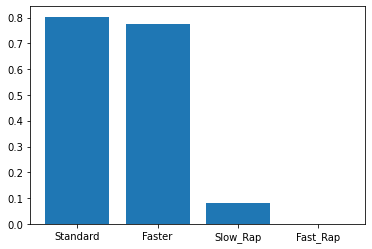

In [30]:
mpl.bar(results.Type, results.Similarity);

Throughout the project, I learned a lot about extracting text and processing audio files!